In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import concurrent.futures

from sklearn.preprocessing import OneHotEncoder
from IPython.display import display, HTML
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score, mean_absolute_error, mean_absolute_percentage_error, confusion_matrix, classification_report

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
data_krs = pd.read_csv('Dosen - Krs Mahasiswa.csv')
data_krs.head()

,npm_mahasiswa,jenis_semester,tahun_semester,kode_kelas,kode_matkul,nama_matkul,sks_matakuliah,total_hadir,total_pertemuan,total_terlaksana,total_tidak_hadir,kode_nilai,kategori
0,1931001,ganjil,2019,1BUMA,SI00194,Agama,2,0,0,0,0,A,Agama
1,1931001,ganjil,2019,1SIMA,SI00153,Arsitektur dan Organisasi Komputer,3,0,0,0,0,A,Computer Hardware
2,1931001,ganjil,2019,1VUMD,SI00192,Bahasa Inggris I,2,0,0,0,0,A,Bahasa
3,1931001,ganjil,2019,1SIMA,SIL0085,Lab. Teknik Pemograman,1,0,0,0,0,A,Basic Programming
4,1931001,ganjil,2019,1SIMA,SI00151,Pengantar Sistem Informasi,3,0,0,0,0,B,Manajemen


In [4]:
data_krs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991 entries, 0 to 31990
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   npm_mahasiswa      31991 non-null  int64 
 1   jenis_semester     31991 non-null  object
 2   tahun_semester     31991 non-null  int64 
 3   kode_kelas         31991 non-null  object
 4   kode_matkul        31991 non-null  object
 5   nama_matkul        31991 non-null  object
 6   sks_matakuliah     31991 non-null  int64 
 7   total_hadir        31991 non-null  int64 
 8   total_pertemuan    31991 non-null  int64 
 9   total_terlaksana   31991 non-null  int64 
 10  total_tidak_hadir  31991 non-null  int64 
 11  kode_nilai         29052 non-null  object
 12  kategori           31991 non-null  object
dtypes: int64(7), object(6)
memory usage: 3.2+ MB


In [5]:
data_penelitian = pd.read_csv('Dosen - Judul Penelitian.csv')
data_penelitian.head()

,nidn_dosen,judul_penelitian,kategori_utama,kategori_pendukung,tanggal_terbit,jenis_publikasi,tingkat_publikasi
0,1014118601,Studi Faktor Pendukung Popularitas Multiplayer...,Game Making,Marketing,29/06/2021,Sinta,Jurnal Nasional Terakreditasi SINTA 3-6
1,1021106601,INSTITUTIONAL WORK AND IMPLEMENTATION OF A PER...,NaN,NaN,08/07/2020,Scopus,Jurnal Ilmiah Internasional Terindeks Scopus Q...
2,1006017703,Konseptualisasi Peran Strategis dalam Pendidik...,NaN,NaN,23/11/2020,Nasional non-sinta,Jurnal Nasional terakreditasi Kemenristekdikti...
3,1001068701,Busy board: Evidence from CEOs and director’s ...,NaN,NaN,27/01/2021,Sinta,Jurnal Nasional Terakreditasi SINTA 1-2
4,1006017703,Analisis Perilaku Konsumen dan Keuangan Terhad...,NaN,NaN,28/11/2020,Nasional non-sinta,Jurnal Nasional terakreditasi Kemenristekdikti...


In [6]:
data_penelitian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   nidn_dosen          1825 non-null   object
 1   judul_penelitian    1827 non-null   object
 2   kategori_utama      220 non-null    object
 3   kategori_pendukung  221 non-null    object
 4   tanggal_terbit      1829 non-null   object
 5   jenis_publikasi     1795 non-null   object
 6   tingkat_publikasi   1829 non-null   object
dtypes: object(7)
memory usage: 100.1+ KB


In [7]:
data_mahasiswa = pd.read_csv('Dosen - Data Mahasiswa.csv')
data_mahasiswa.head()

,npm_mahasiswa,nama_mahasiswa,prodi_mahasiswa,angkatan_mahasiswa,ipk_mahasiswa,status_mahasiswa,id_dosen
0,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028.0
1,1931001,Rido Renando,Sistem Informasi,2019,3.72,Lulus,1170002.0
2,1931009,Richie Marlon,Sistem Informasi,2019,3.90,Lulus,5120028.0
3,1931083,Elvin Whang,Sistem Informasi,2019,3.68,Lulus,6200076.0
4,2031001,Robin Sunjaya,Sistem Informasi,2020,3.88,Aktif,9180074.0


In [8]:
data_mahasiswa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   npm_mahasiswa       673 non-null    int64  
 1   nama_mahasiswa      673 non-null    object 
 2   prodi_mahasiswa     673 non-null    object 
 3   angkatan_mahasiswa  673 non-null    int64  
 4   ipk_mahasiswa       670 non-null    float64
 5   status_mahasiswa    673 non-null    object 
 6   id_dosen            636 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 36.9+ KB


In [9]:
data_dosen = pd.read_csv('Dosen - Data Dosen.csv')
data_mahasiswa.head()

,npm_mahasiswa,nama_mahasiswa,prodi_mahasiswa,angkatan_mahasiswa,ipk_mahasiswa,status_mahasiswa,id_dosen
0,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028.0
1,1931001,Rido Renando,Sistem Informasi,2019,3.72,Lulus,1170002.0
2,1931009,Richie Marlon,Sistem Informasi,2019,3.90,Lulus,5120028.0
3,1931083,Elvin Whang,Sistem Informasi,2019,3.68,Lulus,6200076.0
4,2031001,Robin Sunjaya,Sistem Informasi,2020,3.88,Aktif,9180074.0


In [10]:
data_mahasiswa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   npm_mahasiswa       673 non-null    int64  
 1   nama_mahasiswa      673 non-null    object 
 2   prodi_mahasiswa     673 non-null    object 
 3   angkatan_mahasiswa  673 non-null    int64  
 4   ipk_mahasiswa       670 non-null    float64
 5   status_mahasiswa    673 non-null    object 
 6   id_dosen            636 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 36.9+ KB


In [11]:
print(data_krs.columns)
print(data_penelitian.columns)
print(data_mahasiswa.columns)
print(data_dosen.columns)

Index(['npm_mahasiswa', 'jenis_semester', 'tahun_semester', 'kode_kelas',
       'kode_matkul', 'nama_matkul', 'sks_matakuliah', 'total_hadir',
       'total_pertemuan', 'total_terlaksana', 'total_tidak_hadir',
       'kode_nilai', 'kategori'],
      dtype='object')
Index(['nidn_dosen', 'judul_penelitian', 'kategori_utama',
       'kategori_pendukung', 'tanggal_terbit', 'jenis_publikasi',
       'tingkat_publikasi'],
      dtype='object')
Index(['npm_mahasiswa', 'nama_mahasiswa', 'prodi_mahasiswa',
       'angkatan_mahasiswa', 'ipk_mahasiswa', 'status_mahasiswa', 'id_dosen'],
      dtype='object')
Index(['nidn_dosen', 'nama', 'id_dosen'], dtype='object')


In [88]:
# Cek dan ubah kolom 'nidn_dosen' di data_penelitian
if 'nidn_dosen' in data_penelitian.columns:
    data_penelitian['nidn_dosen'] = pd.to_numeric(data_penelitian['nidn_dosen'], errors='coerce').fillna(0).astype(int)

# Cek dan ubah kolom 'nidn_dosen' di data_dosen
if 'nidn_dosen' in data_dosen.columns:
    data_dosen['nidn_dosen'] = pd.to_numeric(data_dosen['nidn_dosen'], errors='coerce').fillna(0).astype(int)

# Cek dan ubah kolom 'id_dosen' di data_mahasiswa
if 'id_dosen' in data_mahasiswa.columns:
    data_mahasiswa['id_dosen'] = pd.to_numeric(data_mahasiswa['id_dosen'], errors='coerce').fillna(0).astype(int)

# Cek dan ubah kolom 'id_dosen' di data_krs jika ada
if 'id_dosen' in data_krs.columns:
    data_krs['id_dosen'] = pd.to_numeric(data_krs['id_dosen'], errors='coerce').fillna(0).astype(int)

# merge

In [89]:
# Merge data dosen dengan data penelitian berdasarkan 'nidn_dosen'
merged_dosen_penelitian = pd.merge(data_dosen, data_penelitian, on='nidn_dosen', how='left')
merged_dosen_penelitian.head()

,nidn_dosen,nama,id_dosen,judul_penelitian,kategori_utama,kategori_pendukung,tanggal_terbit,jenis_publikasi,tingkat_publikasi
0,318037803,Dion Dewa Barata,7210027,Analisis Kinerja Keuangan pada Perusahaan Manu...,NaN,NaN,05/09/2022,Nasional non-sinta,Jurnal Nasional terakreditasi Kemenristekdikti...
1,318037803,Dion Dewa Barata,7210027,"Analisis Pengaruhnya Perceived Ease of Use, Pe...",NaN,NaN,05/09/2022,Nasional non-sinta,Jurnal Nasional terakreditasi Kemenristekdikti...
2,428127802,Dessy Aliandrina,2200054,Analisis Pengaruh Iklan Layanan Masyarakat ter...,NaN,NaN,16/11/2023,Sinta,Jurnal Nasional Terakreditasi SINTA 3-6
3,703017702,Lily Purwianti,4060029,"Pengaruh Religiostik, EWOM, Brand Image dan At...",NaN,NaN,01/04/2021,Sinta,Jurnal Nasional Terakreditasi SINTA 3-6
4,703017702,Lily Purwianti,4060029,ANALISA FAKTOR-FAKTOR YANG MEMPENGARUHI PURCHA...,NaN,NaN,25/04/2019,Nasional non-sinta,Jurnal Nasional


In [90]:
# Langkah 2: Merge data mahasiswa dengan data KRS berdasarkan 'npm_mahasiswa'
merged_mahasiswa_krs = pd.merge(data_mahasiswa, data_krs, on='npm_mahasiswa', how='inner')
# Menghitung niat_kehadiran
merged_mahasiswa_krs['niat_kehadiran'] = merged_mahasiswa_krs['total_hadir'] / merged_mahasiswa_krs['total_pertemuan']
merged_mahasiswa_krs.head()

,npm_mahasiswa,nama_mahasiswa,prodi_mahasiswa,angkatan_mahasiswa,ipk_mahasiswa,status_mahasiswa,id_dosen,jenis_semester,tahun_semester,kode_kelas,kode_matkul,nama_matkul,sks_matakuliah,total_hadir,total_pertemuan,total_terlaksana,total_tidak_hadir,kode_nilai,kategori,niat_kehadiran
0,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028,ganjil,2019,1SIPA,SI00153,Arsitektur dan Organisasi Komputer,3,0,0,0,0,A,Computer Hardware,NaN
1,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028,ganjil,2019,1SIPA,SIL0085,Lab. Teknik Pemograman,1,0,0,0,0,A,Basic Programming,NaN
2,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028,ganjil,2019,1SIPA,SI00151,Pengantar Sistem Informasi,3,0,0,0,0,A,Manajemen,NaN
3,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028,ganjil,2019,1SIPA,SI00152,Teknik Pemograman,3,0,0,0,0,A,Basic Programming,NaN
4,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028,ganjil,2019,1SIPA,SIL0117,Lab. Desain Interaksi,1,0,0,0,0,A,Design,NaN


In [91]:
# Langkah 3: Merge hasil dari mahasiswa + KRS dengan dosen + penelitian berdasarkan 'id_dosen'
final_merged_data = pd.merge(merged_mahasiswa_krs, merged_dosen_penelitian, on='id_dosen', how='left')
# Menambahkan kolom apakah kategori mata kuliah cocok dengan kategori penelitian dosen
final_merged_data['cocok_kategori_penelitian'] = final_merged_data.apply(lambda row: 1 if row['kategori'] in [row['kategori_utama'], row['kategori_pendukung']] else 0, axis=1)
final_merged_data.rename(columns={
    'nama': 'nama_dosen_predicted',
    'nidn_dosen': 'nidn_dosen_predicted',
}, inplace=True)
final_merged_data.head()
# final_merged_data.to_csv('final_merged_data.csv', index=False)

,npm_mahasiswa,nama_mahasiswa,prodi_mahasiswa,angkatan_mahasiswa,ipk_mahasiswa,status_mahasiswa,id_dosen,jenis_semester,tahun_semester,kode_kelas,...,niat_kehadiran,nidn_dosen_predicted,nama_dosen_predicted,judul_penelitian,kategori_utama,kategori_pendukung,tanggal_terbit,jenis_publikasi,tingkat_publikasi,cocok_kategori_penelitian
0,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028,ganjil,2019,1SIPA,...,NaN,1.020049e+09,Deli,Analisis User Interface Pada Media Pembelajara...,Design,Game Making,07/02/2021,Sinta,Jurnal Nasional Terakreditasi SINTA 3-6,0
1,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028,ganjil,2019,1SIPA,...,NaN,1.020049e+09,Deli,Perancangan Video Testimoni Miracle Male Aesth...,Movie Making,Design,18/10/2021,Sinta,Jurnal Nasional Terakreditasi SINTA 3-6,0
2,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028,ganjil,2019,1SIPA,...,NaN,1.020049e+09,Deli,Perancangan Strategi Kreatif Rebranding Progra...,Manajemen,-,30/08/2021,Sinta,Jurnal Nasional Terakreditasi SINTA 3-6,0
3,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028,ganjil,2019,1SIPA,...,NaN,1.020049e+09,Deli,ANALISIS KEEFEKTIFAN BUKU FOTO SEBAGAI MEDIA I...,Design,Marketing,30/11/2022,Nasional non-sinta,Jurnal Nasional,0
4,1931173,Celine Te,Sistem Informasi,2019,3.87,Lulus,5120028,ganjil,2019,1SIPA,...,NaN,1.020049e+09,Deli,ANALISIS KEEFEKTIFAN BUKU FOTO SEBAGAI MEDIA I...,Design,Marketing,29/12/2022,Nasional non-sinta,Jurnal Nasional terakreditasi Kemenristekdikti...,0


# EDA

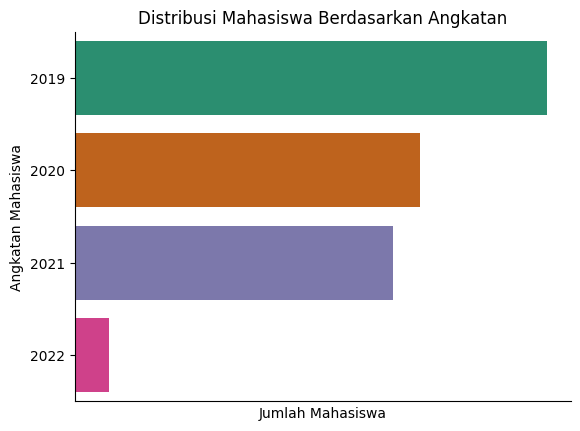

In [92]:
# Hitung jumlah mahasiswa per angkatan
counts = final_merged_data['angkatan_mahasiswa'].value_counts()

# Membuat grafik batang horizontal
# plt.figure(figsize=(10, 6))
sns.barplot(y=counts.index, x=counts.values, palette='Dark2', orient='h')

# Menyembunyikan garis tepi atas dan kanan
plt.gca().spines[['top', 'right']].set_visible(False)

# Menambahkan label dan judul
plt.xlabel('Jumlah Mahasiswa')
plt.ylabel('Angkatan Mahasiswa')
plt.title('Distribusi Mahasiswa Berdasarkan Angkatan')

plt.xticks([])

plt.show()

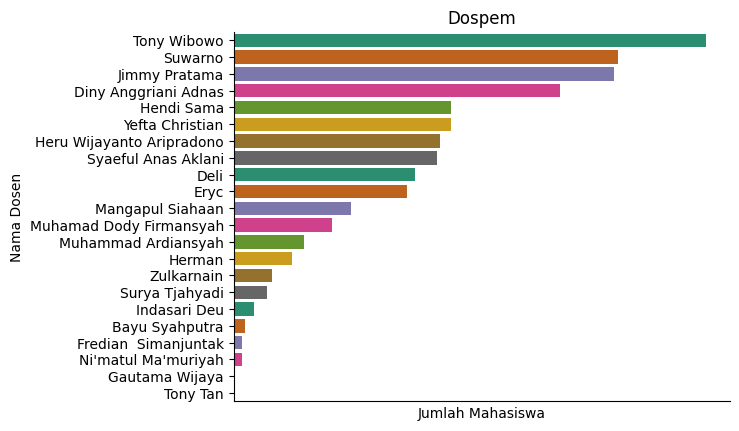

In [93]:
# Hitung jumlah mahasiswa per angkatan
counts = final_merged_data['nama_dosen_predicted'].value_counts()

# Membuat grafik batang horizontal
# plt.figure(figsize=(10, 6))
sns.barplot(y=counts.index, x=counts.values, palette='Dark2', orient='h')

# Menyembunyikan garis tepi atas dan kanan
plt.gca().spines[['top', 'right']].set_visible(False)

# Menambahkan label dan judul
plt.xlabel('Jumlah Mahasiswa')
plt.ylabel('Nama Dosen')
plt.title('Dospem')

plt.xticks([])

plt.show()

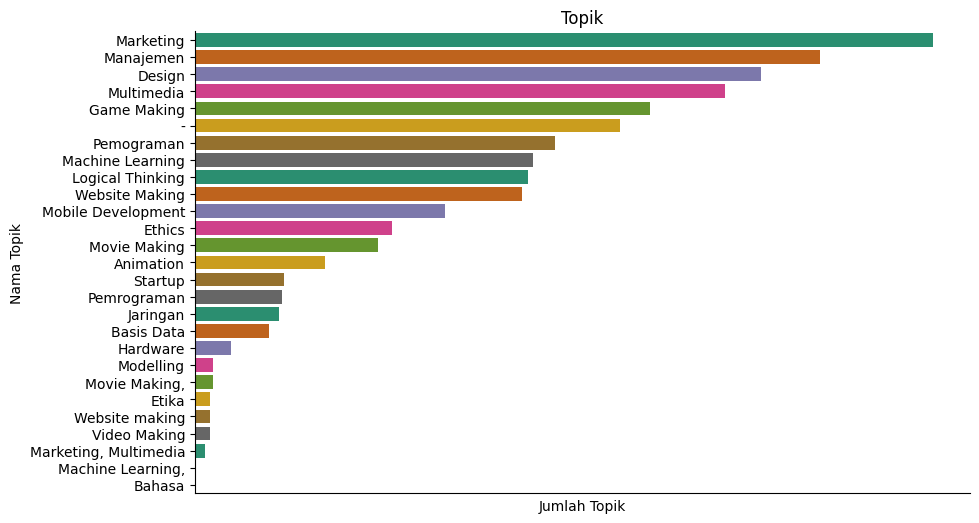

In [79]:
# Menggabungkan kategori utama dan kategori pendukung menjadi satu kolom
combined_categories = pd.concat([final_merged_data['kategori_utama'], final_merged_data['kategori_pendukung']])

counts = combined_categories.value_counts().reset_index()
counts.columns = ['kategori', 'jumlah']  # Mengganti nama kolom

# Membuat grafik batang horizontal
plt.figure(figsize=(10, 6))  # Atur ukuran grafik
sns.barplot(y=counts['kategori'], x=counts['jumlah'], palette='Dark2', orient='h')

# Menyembunyikan garis tepi atas dan kanan
plt.gca().spines[['top', 'right']].set_visible(False)

# Menambahkan label dan judul
plt.xlabel('Jumlah Topik')
plt.ylabel('Nama Topik')
plt.title('Topik')

plt.xticks([])
# Menampilkan grafik
plt.show()

# Clean

In [95]:
final_merged_data = final_merged_data[['npm_mahasiswa', 'nama_mahasiswa', 'ipk_mahasiswa', 'nama_matkul', 'sks_matakuliah',
                                       'total_hadir', 'total_pertemuan', 'niat_kehadiran', 'kode_nilai', 'kategori',
                                       'nidn_dosen_predicted', 'nama_dosen_predicted', 'cocok_kategori_penelitian']]
final_merged_data.head()

,npm_mahasiswa,nama_mahasiswa,ipk_mahasiswa,nama_matkul,sks_matakuliah,total_hadir,total_pertemuan,niat_kehadiran,kode_nilai,kategori,nidn_dosen_predicted,nama_dosen_predicted,cocok_kategori_penelitian
0,1931173,Celine Te,3.87,Arsitektur dan Organisasi Komputer,3,0,0,NaN,A,Computer Hardware,1.020049e+09,Deli,0
1,1931173,Celine Te,3.87,Arsitektur dan Organisasi Komputer,3,0,0,NaN,A,Computer Hardware,1.020049e+09,Deli,0
2,1931173,Celine Te,3.87,Arsitektur dan Organisasi Komputer,3,0,0,NaN,A,Computer Hardware,1.020049e+09,Deli,0
3,1931173,Celine Te,3.87,Arsitektur dan Organisasi Komputer,3,0,0,NaN,A,Computer Hardware,1.020049e+09,Deli,0
4,1931173,Celine Te,3.87,Arsitektur dan Organisasi Komputer,3,0,0,NaN,A,Computer Hardware,1.020049e+09,Deli,0


In [96]:
# drop null and duplicated data
final_merged_data.dropna(inplace=True)
final_merged_data.head()

,npm_mahasiswa,nama_mahasiswa,ipk_mahasiswa,nama_matkul,sks_matakuliah,total_hadir,total_pertemuan,niat_kehadiran,kode_nilai,kategori,nidn_dosen_predicted,nama_dosen_predicted,cocok_kategori_penelitian
261,1931173,Celine Te,3.87,Bahasa Mandarin,3,14,14,1.0,B,Bahasa,1.020049e+09,Deli,0
262,1931173,Celine Te,3.87,Bahasa Mandarin,3,14,14,1.0,B,Bahasa,1.020049e+09,Deli,0
263,1931173,Celine Te,3.87,Bahasa Mandarin,3,14,14,1.0,B,Bahasa,1.020049e+09,Deli,0
264,1931173,Celine Te,3.87,Bahasa Mandarin,3,14,14,1.0,B,Bahasa,1.020049e+09,Deli,0
265,1931173,Celine Te,3.87,Bahasa Mandarin,3,14,14,1.0,B,Bahasa,1.020049e+09,Deli,0


# Transform

In [97]:
# transform numerical features to float
numerical_features = ['ipk_mahasiswa', 'niat_kehadiran']

for col in numerical_features:
  final_merged_data[col] = final_merged_data[col].astype(float)

final_merged_data.head()

,npm_mahasiswa,nama_mahasiswa,ipk_mahasiswa,nama_matkul,sks_matakuliah,total_hadir,total_pertemuan,niat_kehadiran,kode_nilai,kategori,nidn_dosen_predicted,nama_dosen_predicted,cocok_kategori_penelitian
261,1931173,Celine Te,3.87,Bahasa Mandarin,3,14,14,1.0,B,Bahasa,1.020049e+09,Deli,0
262,1931173,Celine Te,3.87,Bahasa Mandarin,3,14,14,1.0,B,Bahasa,1.020049e+09,Deli,0
263,1931173,Celine Te,3.87,Bahasa Mandarin,3,14,14,1.0,B,Bahasa,1.020049e+09,Deli,0
264,1931173,Celine Te,3.87,Bahasa Mandarin,3,14,14,1.0,B,Bahasa,1.020049e+09,Deli,0
265,1931173,Celine Te,3.87,Bahasa Mandarin,3,14,14,1.0,B,Bahasa,1.020049e+09,Deli,0


In [98]:
# Simpan hasil ke CSV
final_merged_data.to_csv('train.csv', index=False)
print("Data berhasil digabungkan dan disimpan dalam 'train.csv'.")
# create a copy of data
final_merged_data = final_merged_data.copy(deep=True)

Data berhasil digabungkan dan disimpan dalam 'train.csv'.


In [99]:
# Assuming 'data' is your DataFrame
label_enc = LabelEncoder()

# Encode categorical columns
final_merged_data['nama_matkul'] = label_enc.fit_transform(final_merged_data['nama_matkul'])
final_merged_data['kategori'] = label_enc.fit_transform(final_merged_data['kategori'])
final_merged_data['kode_nilai'] = label_enc.fit_transform(final_merged_data['kode_nilai'])
final_merged_data['nidn_dosen_predicted'] = label_enc.fit_transform(final_merged_data['nidn_dosen_predicted'])
final_merged_data['cocok_kategori_penelitian'] = label_enc.fit_transform(final_merged_data['cocok_kategori_penelitian'])
final_merged_data['nama_dosen_predicted'] = label_enc.fit_transform(final_merged_data['nama_dosen_predicted'])

# Display the first few rows of the encoded final_merged_data
final_merged_data.head()

,npm_mahasiswa,nama_mahasiswa,ipk_mahasiswa,nama_matkul,sks_matakuliah,total_hadir,total_pertemuan,niat_kehadiran,kode_nilai,kategori,nidn_dosen_predicted,nama_dosen_predicted,cocok_kategori_penelitian
261,1931173,Celine Te,3.87,12,3,14,14,1.0,1,2,14,1,0
262,1931173,Celine Te,3.87,12,3,14,14,1.0,1,2,14,1,0
263,1931173,Celine Te,3.87,12,3,14,14,1.0,1,2,14,1,0
264,1931173,Celine Te,3.87,12,3,14,14,1.0,1,2,14,1,0
265,1931173,Celine Te,3.87,12,3,14,14,1.0,1,2,14,1,0


In [100]:
print(final_merged_data.count())

npm_mahasiswa                168287
nama_mahasiswa               168287
ipk_mahasiswa                168287
nama_matkul                  168287
sks_matakuliah               168287
total_hadir                  168287
total_pertemuan              168287
niat_kehadiran               168287
kode_nilai                   168287
kategori                     168287
nidn_dosen_predicted         168287
nama_dosen_predicted         168287
cocok_kategori_penelitian    168287
dtype: int64


# Outliers

In [101]:
# First, select the numerical features to check for outliers
numerical_features = ['ipk_mahasiswa', 'total_hadir', 'total_pertemuan', 'niat_kehadiran']

# Calculate the z-scores of the numerical features
z_scores = np.abs(zscore(final_merged_data[numerical_features]))

# Define a threshold for outliers
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers from the DataFrame
data_cleaned = final_merged_data[~outliers]

# Display the cleaned data
data_cleaned.head()

,npm_mahasiswa,nama_mahasiswa,ipk_mahasiswa,nama_matkul,sks_matakuliah,total_hadir,total_pertemuan,niat_kehadiran,kode_nilai,kategori,nidn_dosen_predicted,nama_dosen_predicted,cocok_kategori_penelitian
261,1931173,Celine Te,3.87,12,3,14,14,1.0,1,2,14,1,0
262,1931173,Celine Te,3.87,12,3,14,14,1.0,1,2,14,1,0
263,1931173,Celine Te,3.87,12,3,14,14,1.0,1,2,14,1,0
264,1931173,Celine Te,3.87,12,3,14,14,1.0,1,2,14,1,0
265,1931173,Celine Te,3.87,12,3,14,14,1.0,1,2,14,1,0


In [102]:
print(final_merged_data.count())

npm_mahasiswa                168287
nama_mahasiswa               168287
ipk_mahasiswa                168287
nama_matkul                  168287
sks_matakuliah               168287
total_hadir                  168287
total_pertemuan              168287
niat_kehadiran               168287
kode_nilai                   168287
kategori                     168287
nidn_dosen_predicted         168287
nama_dosen_predicted         168287
cocok_kategori_penelitian    168287
dtype: int64


In [103]:
X = final_merged_data.drop(['npm_mahasiswa', 'nama_mahasiswa', 'nama_dosen_predicted'], axis=1)

y = final_merged_data['nama_dosen_predicted']

X = pd.get_dummies(X, columns=['kategori', 'cocok_kategori_penelitian'], drop_first=True)

In [68]:
X.head()
# X.to_csv('X.csv', index=False)

,ipk_mahasiswa,nama_matkul,sks_matakuliah,total_hadir,total_pertemuan,niat_kehadiran,kode_nilai,nidn_dosen_predicted,kategori_1,kategori_2,...,kategori_19,kategori_20,kategori_21,kategori_22,kategori_23,kategori_24,kategori_25,kategori_26,kategori_27,cocok_kategori_penelitian_1
261,3.87,12,3,14,14,1.0,1,14,False,True,...,False,False,False,False,False,False,False,False,False,False
262,3.87,12,3,14,14,1.0,1,14,False,True,...,False,False,False,False,False,False,False,False,False,False
263,3.87,12,3,14,14,1.0,1,14,False,True,...,False,False,False,False,False,False,False,False,False,False
264,3.87,12,3,14,14,1.0,1,14,False,True,...,False,False,False,False,False,False,False,False,False,False
265,3.87,12,3,14,14,1.0,1,14,False,True,...,False,False,False,False,False,False,False,False,False,False


In [29]:
y.head()

,nama_dosen_predicted
261,1
262,1
263,1
264,1
265,1


# Train

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# @title Random Forest Regressor
model = RandomForestRegressor(n_estimators=300, max_depth=50, max_features=5, random_state=42)

In [32]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, max_features=5, n_estimators=300,
                      random_state=42)

In [33]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [34]:
print("Random Forest Regressor")
print('Train')
print('MSE: %.4f' % mean_squared_error(y_train, train_predict))
print('MAE: %.4f' % mean_absolute_error(y_train, train_predict))
print('R2 Score: %.4f\n' % r2_score(y_train, train_predict))

print('Test')
print('MSE: %.4f' % mean_squared_error(y_test, test_predict))
print('MAE: %.4f' % mean_absolute_error(y_test, test_predict))
print('R2 Score: %.4f' % r2_score(y_test, test_predict))

Random Forest Regressor
Train
MSE: 0.0313
MAE: 0.0240
R2 Score: 0.9993

Test
MSE: 0.2015
MAE: 0.0591
R2 Score: 0.9952


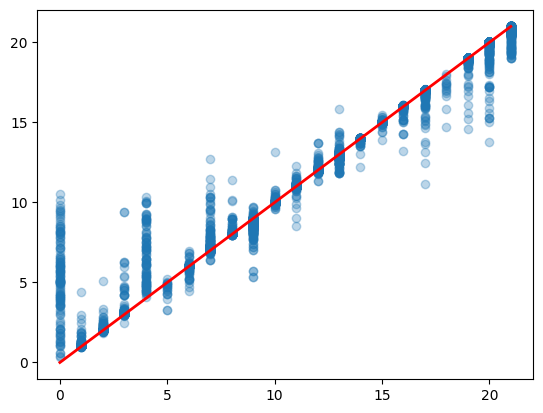

In [35]:
plt.scatter(y_test, test_predict, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

In [36]:
# @title Linear Regression
model = LinearRegression(fit_intercept=True)

In [37]:
model.fit(X_train, y_train)

LinearRegression()

In [38]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [39]:
print("Linear Regression")
print('Train')
print('MSE: %.4f' % mean_squared_error(y_train, train_predict))
print('MAE: %.4f' % mean_absolute_error(y_train, train_predict))
print('R2 Score: %.4f\n' % r2_score(y_train, train_predict))

print('Test')
print('MSE: %.4f' % mean_squared_error(y_test, test_predict))
print('MAE: %.4f' % mean_absolute_error(y_test, test_predict))
print('R2 Score: %.4f' % r2_score(y_test, test_predict))

Linear Regression
Train
MSE: 40.1777
MAE: 5.6132
R2 Score: 0.0460

Test
MSE: 40.2950
MAE: 5.6224
R2 Score: 0.0409


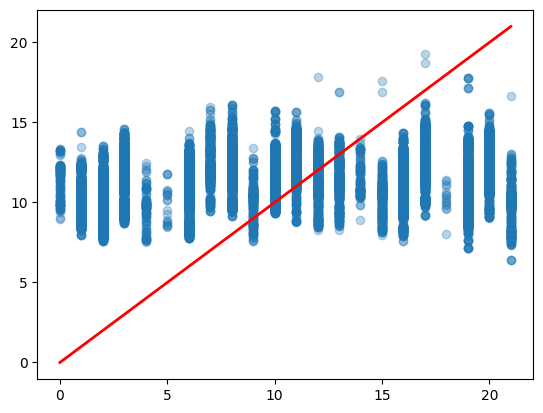

In [40]:
plt.scatter(y_test, test_predict, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

In [41]:
# @title Decision Tree Regressor
model = DecisionTreeRegressor(criterion='squared_error', max_depth=None, max_leaf_nodes=400, splitter='best')

In [42]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=400)

In [43]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [44]:
print("Decision Tree Regressor")
print('Train')
print('MSE: %.4f' % mean_squared_error(y_train, train_predict))
print('MAE: %.4f' % mean_absolute_error(y_train, train_predict))
print('R2 Score: %.4f\n' % r2_score(y_train, train_predict))

print('Test')
print('MSE: %.4f' % mean_squared_error(y_test, test_predict))
print('MAE: %.4f' % mean_absolute_error(y_test, test_predict))
print('R2 Score: %.4f' % r2_score(y_test, test_predict))

Decision Tree Regressor
Train
MSE: 0.0000
MAE: 0.0000
R2 Score: 1.0000

Test
MSE: 0.0000
MAE: 0.0000
R2 Score: 1.0000


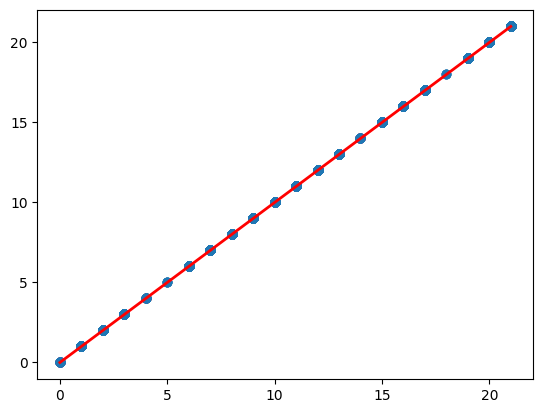

In [45]:
plt.scatter(y_test, test_predict, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

In [46]:
# @title Gradient Boosting Regressor
model = GradientBoostingRegressor()

In [47]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [48]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [49]:
print("Gradient Boosting Regressor")
print('Train')
print('MSE: %.4f' % mean_squared_error(y_train, train_predict))
print('MAE: %.4f' % mean_absolute_error(y_train, train_predict))
print('R2 Score: %.4f\n' % r2_score(y_train, train_predict))

print('Test')
print('MSE: %.4f' % mean_squared_error(y_test, test_predict))
print('MAE: %.4f' % mean_absolute_error(y_test, test_predict))
print('R2 Score: %.4f' % r2_score(y_test, test_predict))

Gradient Boosting Regressor
Train
MSE: 0.0610
MAE: 0.1360
R2 Score: 0.9986

Test
MSE: 0.0563
MAE: 0.1343
R2 Score: 0.9987


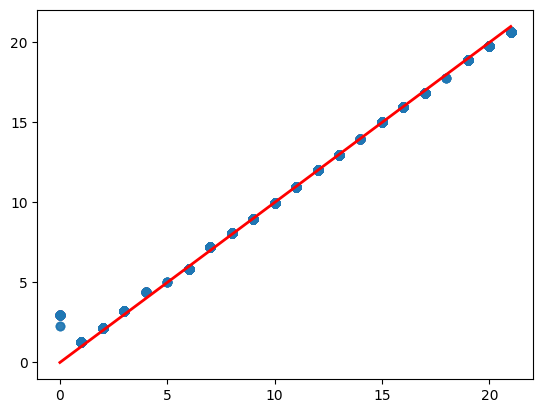

In [50]:
plt.scatter(y_test, test_predict, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

In [51]:
# @title XGB Regressor
model = XGBRegressor()

In [52]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [53]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [54]:
print("XGB Regressor")
print('------------------------')
print('Training')
print('MSE: %.4f' % mean_squared_error(y_train, train_predict))
print('MAE: %.4f' % mean_absolute_error(y_train, train_predict))
print('R2 Score: %.4f\n' % r2_score(y_train, train_predict))

print('Testing')
print('MSE: %.4f' % mean_squared_error(y_test, test_predict))
print('MAE: %.4f' % mean_absolute_error(y_test, test_predict))
print('R2 Score: %.4f' % r2_score(y_test, test_predict))

XGB Regressor
------------------------
Training
MSE: 0.0000
MAE: 0.0000
R2 Score: 1.0000

Testing
MSE: 0.0000
MAE: 0.0000
R2 Score: 1.0000


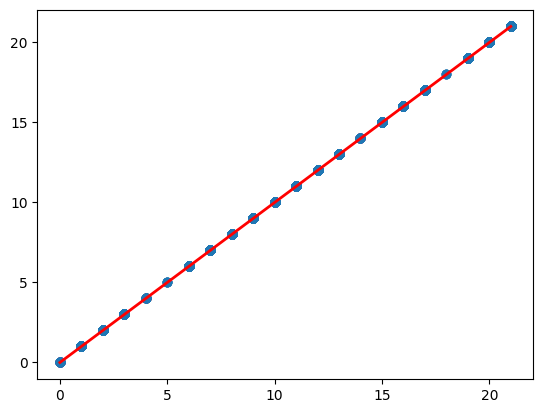

In [55]:
plt.scatter(y_test, test_predict, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

# Choosen model
From few models we have tried, we chosen 3 models that are suitable


# Model tune & evaluation

In [61]:
def find_best_model(X, y):
    models = {
        'Gradient Boosting Regressor': {
            'model': GradientBoostingRegressor(),
            'parameters': {
                'n_estimators': [50],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3],
            }
        },
        'Random Forest Regressor': {
            'model': RandomForestRegressor(),
            'parameters': {
                'n_estimators': [100],
                'max_depth': [30, 40],
                'max_features': ['sqrt']
            }
        },
        'XGB Regressor': {
            'model': XGBRegressor(),
            'parameters': {
                'n_estimators': [50],
                'learning_rate': [0.1],
                'max_depth': [3]
            }
        },
    }

    results = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

    for model_name, model_params in models.items():
        model = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_shuffle, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
        model.fit(X, y)
        results.append({
            'Name' : model_name,
            'Best Parameters': model.best_params_,
            'Score' : '%.4f' % model.best_score_,
            'Best Model': model.best_estimator_,
        })

    return pd.DataFrame(results,columns=['Name', 'Best Parameters', 'Score', 'Best Model'])

best_model = find_best_model(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [62]:
best_model

,Name,Best Parameters,Score,Best Model
0,Gradient Boosting Regressor,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",-1.0752,([DecisionTreeRegressor(criterion='friedman_ms...
1,Random Forest Regressor,"{'max_depth': 40, 'max_features': 'sqrt', 'n_e...",-0.2536,"(DecisionTreeRegressor(max_depth=40, max_featu..."
2,XGB Regressor,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",-1.0757,"XGBRegressor(base_score=None, booster=None, ca..."


In [63]:
# @title Random Forest Regressor
model = best_model[best_model['Name'] == 'Random Forest Regressor']['Best Model'].reset_index(drop=True)[0]
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

print("Random Forest Regressor")
print('Train')
print('MSE: %.4f' % mean_squared_error(y_train, train_predict))
print('MAE: %.4f' % mean_absolute_error(y_train, train_predict))
print('R2 Score: %.4f\n' % r2_score(y_train, train_predict))

print('Test')
print('MSE: %.4f' % mean_squared_error(y_test, test_predict))
print('MAE: %.4f' % mean_absolute_error(y_test, test_predict))
print('R2 Score: %.4f' % r2_score(y_test, test_predict))

Random Forest Regressor
Train
MSE: 0.0278
MAE: 0.0300
R2 Score: 0.9993

Test
MSE: 0.1543
MAE: 0.0586
R2 Score: 0.9963


In [64]:
# @title XGB Regressor
model = best_model[best_model['Name'] == 'XGB Regressor']['Best Model'].reset_index(drop=True)[0]
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

print("XGB Regressor")
print('Train')
print('MSE: %.4f' % mean_squared_error(y_train, train_predict))
print('MAE: %.4f' % mean_absolute_error(y_train, train_predict))
print('R2 Score: %.4f\n' % r2_score(y_train, train_predict))

print('Test')
print('MSE: %.4f' % mean_squared_error(y_test, test_predict))
print('MAE: %.4f' % mean_absolute_error(y_test, test_predict))
print('R2 Score: %.4f' % r2_score(y_test, test_predict))

XGB Regressor
Train
MSE: 1.0276
MAE: 0.6813
R2 Score: 0.9756

Test
MSE: 0.9811
MAE: 0.6758
R2 Score: 0.9766


In [65]:
# @title Gradient Boosting Regressor
model = best_model[best_model['Name'] == 'Gradient Boosting Regressor']['Best Model'].reset_index(drop=True)[0]
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

print("Gradient Boosting Regressor")
print('Train')
print('MSE: %.4f' % mean_squared_error(y_train, train_predict))
print('MAE: %.4f' % mean_absolute_error(y_train, train_predict))
print('R2 Score: %.4f\n' % r2_score(y_train, train_predict))

print('Test')
print('MSE: %.4f' % mean_squared_error(y_test, test_predict))
print('MAE: %.4f' % mean_absolute_error(y_test, test_predict))
print('R2 Score: %.4f' % r2_score(y_test, test_predict))

Gradient Boosting Regressor
Train
MSE: 1.0271
MAE: 0.6826
R2 Score: 0.9756

Test
MSE: 0.9805
MAE: 0.6770
R2 Score: 0.9767


In [86]:
# ['Deli' 'Tony Wibowo' 'Eryc' 'Muhammad Ardiansyah' 'Hendi Sama'
#  'Jimmy Pratama' 'Suwarno' nan 'Muhamad Dody Firmansyah' 'Yefta Christian'
#  'Heru Wijayanto Aripradono' 'Mangapul Siahaan' 'Syaeful Anas Aklani'
#  'Fredian  Simanjuntak' 'Bayu Syahputra' 'Diny Anggriani Adnas' 'Herman'
#  'Surya Tjahyadi' 'Zulkarnain' 'Indasari Deu' 'Tony Tan'
#  "Ni'matul Ma'muriyah" 'Gautama Wijaya']

[ 1 19  3 13  6 10 16 12 20  8 11 17  4  0  2  7 15 21  9 18 14  5]


ValueError: All arrays must be of the same length